In [1]:
%load_ext autoreload
%autoreload 2

import yaml
import torch
import matplotlib.pyplot as plt

In [2]:
config_file = './configs/lego.yaml'
with open(config_file, 'r') as file:
    config = yaml.safe_load(file)

In [3]:
from utils.DataLoaderLego import DataLoaderLego

data_loader = DataLoaderLego(config['data'])

images, poses, focal = data_loader.getDataset('train')

In [4]:
device = 'cpu'
if torch.cuda.is_available():
    device = torch.cuda.current_device()
images = images.to(device)

In [5]:
from utils.Camera import Camera

cameras = []
H, W = images[0].shape[:2]

for i in range(images.shape[0]):
    cameras.append(Camera(H, W, poses[i], focal, device))

In [6]:
from utils.Renderer import Renderer

renderer = Renderer(config['renderer'])

9
9
torch.Size([100, 800, 800, 3]) torch.Size([100, 800, 800, 3]) torch.Size([100, 800, 800, 3])
torch.Size([100, 800, 800, 3, 3])
torch.Size([64000000, 3, 3])
0.03451681137084961
Epoch: 0, Average loss: 0.0035699179861694574, Secs per iter: 0.002069532871246338
torch.Size([640000, 64])
torch.Size([640000, 3])
torch.Size([640000, 64, 5])
torch.Size([640000, 64])
Test PSNR: 7.2366790771484375
torch.Size([640000, 3])


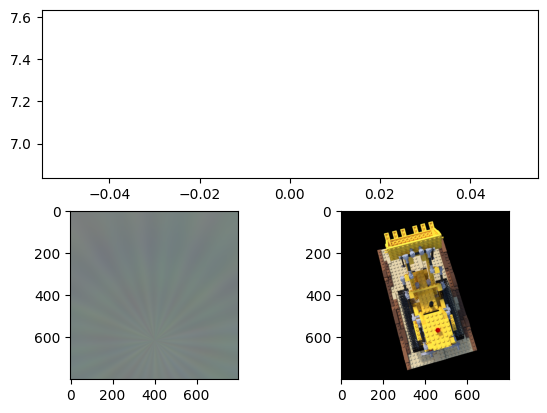

0.02407073974609375
0.0612339973449707
0.06165766716003418
0.06189727783203125
0.061803340911865234
0.061847686767578125
0.061712026596069336
0.06152844429016113
0.06166696548461914
0.061794281005859375
0.06184267997741699
0.06189727783203125
0.06177043914794922
0.061783790588378906
0.06147480010986328
0.06191515922546387
0.06161952018737793
0.06178140640258789
0.06157875061035156
0.06179332733154297
0.062055349349975586
0.06172037124633789
0.061989545822143555
0.06177878379821777
0.06181502342224121
0.061784982681274414
0.06184577941894531
0.0618741512298584
0.061678409576416016
0.06179475784301758
0.06179642677307129
0.061867475509643555
0.061933279037475586
0.06187868118286133
0.061759233474731445
0.06183338165283203
0.06176471710205078
0.06184649467468262
0.06182694435119629
0.061885833740234375
0.06201434135437012
0.06141829490661621
0.06192374229431152
0.06187176704406738
0.06175661087036133
0.06177115440368652
0.061785221099853516
0.06183195114135742
0.061647653579711914
0.06168

KeyboardInterrupt: 

In [7]:
from models.Nerf import Nerf
from utils.TrainerNerf import TrainerNerf
import imageio.v3 as iio

test_img = "nerf_synthetic/lego/val/r_0.png"
test_img = iio.imread(test_img)[:,:,:3]
test_img = torch.tensor(test_img)
# test_img = torch.nn.functional.interpolate(test_img[None,...].permute(
#             0, 3, 1, 2), (100, 100), mode='bilinear', align_corners=False).permute(0, 2, 3, 1)[0]
test_img = test_img/255

test_pose = torch.tensor([
                [
                    -0.963964581489563,
                    -0.2611401677131653,
                    0.0507759265601635,
                    0.2046843022108078
                ],
                [
                    0.26603081822395325,
                    -0.9462433457374573,
                    0.18398693203926086,
                    0.7416750192642212
                ],
                [
                    7.450580596923828e-09,
                    0.1908649355173111,
                    0.9816163182258606,
                    3.957021951675415
                ],
                [
                    0.0,
                    0.0,
                    0.0,
                    1.0
                ]
            ])

model_sparse = Nerf(config['model']['L_xyz'],config['model']['L_dir'])
model_sparse.to(device)
model_fine = Nerf(config['model']['L_xyz'],config['model']['L_dir'])
model_fine.to(device)
model = (model_sparse, model_fine)
trainer = TrainerNerf(model, device, images, cameras, renderer, config['trainer'])
trainer.train(test_img[None,...], test_pose[None,...], focal)

In [ ]:
print(torch.cuda.memory_summary())